# K Nearest Neighbours (KNN) – Home Exercise

This is a home excerise for AI-hub internship candidates. Please submit a Jupyter notebook link. Please do not use any AI (e.g. chatGPT) to solve this.

## A few useful links:
•	Some short data science courses, including intro to Python and Machine learning, can be found on [Kaggle](https://www.kaggle.com/learn)

•	Link to HPC [wiki](https://hpcwiki.weizmann.ac.il/en/home/ai_hub)

•	Link to our WEXAC [Jupyter hub](https://access.wexac.weizmann.ac.il:8000/hub/login) (you'll need a WEXAC user)


## Intoduction
Short intro to machine learning can be found [here](https://www.youtube.com/watch?v=ukzFI9rgwfU)

K Nearest Neighbours: 
KNN is a simple supervised machine learning (ML) algorithm that can be used for classification or regression tasks, and is also frequently used in missing value imputation. It is based on the idea that the closer an observation is to a set of other observations - it is most likely of a "similar" nature. We can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm. 
For classification, a majority vote is often used to determine under which class a new observation should fall into: find the K nearest neighbours, and check out of
these K neighbours which label is the most common - and classify the new observation with this label.
In this exercise you will implement a K-nearest neighbours algorithm on the famous built-in Iris dataset in Python. We will do this in few small steps. 

Please write all your answer as functions and not scripts.

## Tutorial

#### 1. Read the built-in dataset and split it to train and test subsets:

a. Write your imports in the first box (add here all the tutorial imports)

b. Write a function that will open the dataset and split it to training and testing with the default parameters: random_state=42  (42="the meaning of life, the universe, and everything"...) and test_size=20 (20 samples), and run it (there are other intersting parameters like stratify, please do not change the defults). Print the shape of the four output matrices.

c. What are the features and targets in the dataset? 

d. Load as dataFrame and print the statistical desription of the data.

Hints:

A. Use the sklearn function which provides an object that has properties `data` and `target` returning the data and the labels respectively, and `feature_names` and `target_names` returning their descriptions (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for more details)

B. To split the the data between training and testing, use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - and check its parameters.

In [1]:
# Imports
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Question 1b 
def load_split(random_state=42, test_size=20):
    iris = load_iris()
    
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, test_size=test_size, random_state=random_state)
      
    return X_train, X_test, y_train, y_test, iris

X_train, X_test, y_train, y_test, iris = load_split()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (130, 4)
X_test shape: (20, 4)
y_train shape: (130,)
y_test shape: (20,)


In [3]:
# Question 1c

print("The features:", iris.feature_names)
print("The targets:", iris.target_names)


The features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The targets: ['setosa' 'versicolor' 'virginica']


The featurs are lengths of different regions in the plant.
The targets are different types of plants.

In [4]:
# Question 1d
iris = load_iris(as_frame=True)

# Extract the DataFrame
iris_df = iris.frame

print(iris_df.head())
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

#### 2. Distance function: 

Write a function `calc_distance` that calculates the distance between a given point and an array of points. Different distance measures might be used, pick one that is simple. Test it on this input. A simple test that is easy to check by a calculator (or by hand) is alway recommended in your code. 

`calc_distance(X_train[0,:], X_train[:4,:])`

Hint: find a function that does it (e.g. in sklearn) or write it yourself. Check that the point shape is correct.

In [5]:
# Question 2 
def calc_distance(X, Y):
    # X is a single sample, Y is an array of samples
    X = X.reshape(1, -1) #since it is 1D
    return euclidean_distances(X, Y)

In [6]:
calc_distance(X_train[0,:], X_train[:4,:])

array([[0.        , 3.9306488 , 0.41231056, 4.76025209]])

#### 3. K Nearest neighbours: 

Write a function that accepts an input value x0 and searches the training dataset for the k nearest neighbours to x0 using the function you've written, then predicts the input's label according to a majority vote. Test your function for the first row of *the test set* with k=7:

knn(k,X_test[0,:] )

Hint: 
You can calculate all the distances and then sort the distances in ascending order. Then, choose the k first elements. With these k nearest neighbours, do the "voting", i.e. find the most common label amongst them. 


In [7]:
# Question 3
def knn(k, x0, X_train,y_train):
    # k is the number of closest neighbors
    # X0 is the input sample
    
    #calculate the distances between X0 and all other samples:
    distances = calc_distance(x0, X_train)
    
    # sort the distances, and pick the k closest ones:
    sorted_indices = np.argsort(distances)
    nearest_neig = sorted_indices[0][0:k] 

    #find the most common label:
    targets = y_train[nearest_neig]
    #print(targets)
    predicted_label = Counter(targets).most_common(1)[0][0] # take the most frequent label
    
    return predicted_label

In [8]:
print("Predicted label:", knn(7,X_test[0,:],X_train,y_train))

Predicted label: 1


#### 4. Accuracy:

a. Calculate the accuracy (as a percentage) of the above prediction using the test dataset. Run it for k=7.

Hint: 
Calculate the prediction given to every element of the test data and compare it to the expected labels from the test. Calculate the fraction of correctly predicted items to the overall number of items.

b. Think about the time for training and for testing. Is this method efficient for large dataset with many samples and features? Why?


In [9]:
# Quesion 4 
def calc_accuracy(samples, labels, k):
    num_correct = 0
    count = 0
    for i in samples:
        predicted_label = knn(k,i, X_train,y_train)
        true_label = labels[count]
        #print(predicted_label,true_label)
        if predicted_label == true_label:
            num_correct+=1
        count+=1
            
    return (num_correct/len(samples)*100)


In [10]:
print("Accuracy on test dataset:", calc_accuracy(X_test, y_test, 7), "%")

Accuracy on test dataset: 95.0 %


##### Answer 4: 
There is no traditional "training stage" for this model, therefore it is less important. Regarding testing stage, having larger datasets might be problematic due to the loop iterations, sorting of multiple targets and calculating the distance of an input to multiple samples with multiple features - this will probably be more time consuming. Currently I am using a small dataset (150 samples) with only 4 features and 3 labels. probably calculating this on larger samples increase the for loop time, and increase the time to calculate the euclidian distances between samples and sorting them.

#### 5. Dependence on k:

Write a function that calculates the accuracy as a function of k and plots accuracy vs. k.

Hint: use `plot` function in `matplotlib.pyplot`.


In [11]:
# Question 5 
def accuracy_k_dependence(samples, labels, k1, k2):
    accuracies = []
    for k in range(k1,k2):
        accuracy = calc_accuracy(samples, labels, k)
        accuracies.append(accuracy) 
    
    plt.plot(range(k1,k2), accuracies)
    plt.xlabel('Number of neighbors (k)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs. Number of Neighbors')
    plt.grid(True)
    plt.show()

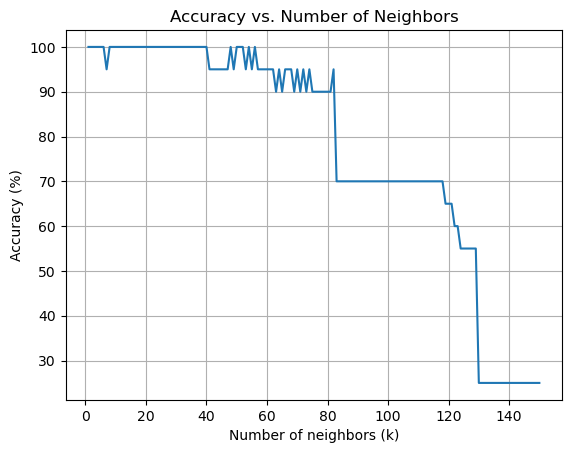

In [12]:
accuracy_k_dependence(X_test, y_test, 1,151)

## 6.  Main function: 

a. Write a main function that contains loading the data and calculating the accuracy as a function of k (k=1,2,..15). 

b. Run it 20 times to check for variations (with random_state=None) with one plot of mean and STD as an output. 

c. What do you learn from it? Which values of k are better?

Hint: Can you see a differnce between odd and even values of k?

In [13]:
# Question 6a

#change accuracy_k_dependence so it will return accuracies list:
def accuracy_k_dependence(samples, labels, k1, k2):
    accuracies = []
    for k in range(k1,k2):
        accuracy = calc_accuracy(samples, labels, k)
        accuracies.append(accuracy) 
    return accuracies
    
def main_function():
    # Load data and perform split:
    global X_train, X_test, y_train, y_test 
    X_train, X_test, y_train, y_test, iris = load_split(random_state=None) # Random state=None for variability
    # Calculate accuracies for a range of k values:
    accuracies = accuracy_k_dependence(X_test, y_test, 1, 16)
    return accuracies

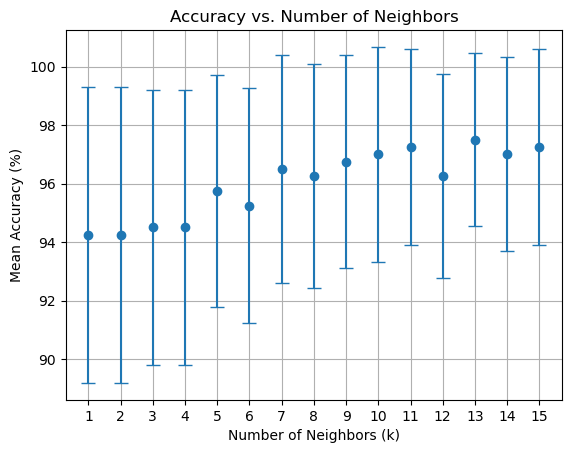

In [14]:
# Question 6b
num_runs = 20
accuracy_list = np.zeros((20,15))

np.random.seed(555)  # Set a random seed for reproducibility

for i in range(num_runs):
    accuracy_list[i] = main_function()
    
mean_accuracies = np.mean(accuracy_list, axis=0)
std_accuracies = np.std(accuracy_list, axis=0)

plt.errorbar(range(1,16), mean_accuracies, yerr=std_accuracies, fmt='o', capsize=5)
plt.xticks(np.arange(1, 16))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy (%)')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()


##### Answer 6c: 
We can see that overall, there is an increase in accuracy with an increase in k. The variability also goes down for higher values of k, indicating better accuracy when the algorithm is given more samples to compare the current sample to. Moreover, we can see a trend where odd numbers (5, 7, 9, 11...) consistently have higher accuracy than even numbers. This trend is because odd k values eliminate the possibility of ties in the "voting" step. With an odd k, there is always a majority class among the neighbors, whereas even k can result in ties. In tie cases, the algorithm chooses a label based on the order of the training data, which can lead to suboptimal classification performance.

#### 7. Scikit-learn KNN classifier:

a. Use sklearn’s [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to write the function calc_accuracy_sklearn that Calculate the accuracy (as a percentage) on the test data. Run it for k=7 and compare the result with question 4. 

b. What are the advantages of using the sklearn module for such a simple classifier?

In [15]:
# Question 7a
X_train, X_test, y_train, y_test, iris = load_split()

def calc_accuracy_sklearn(X_train, X_test, y_train, y_test, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    #neigh.predict(X_test)
    accuracy_score = neigh.score(X_test, y_test)*100
    return accuracy_score

In [16]:
print("Accuracy on test dataset:", calc_accuracy_sklearn(X_train, X_test, y_train, y_test, 7), "%")

Accuracy on test dataset: 95.0 %


##### Answer 7b:
First, it handles the data more efficiently and in a very simple manner, and it is built to handle larger datasets. Second of all, it helps maintain consistency between different users.

#### 8. Scatter plot:

a. Plot the dataset as a scatter plot for features 0 and 2 setting the colors of the points in the plot based on their label, and write the feature names on the axis.

b. What can you learn from this plot?

c. Bonus (optional): plot the boundary display for features 0 and 2 using [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

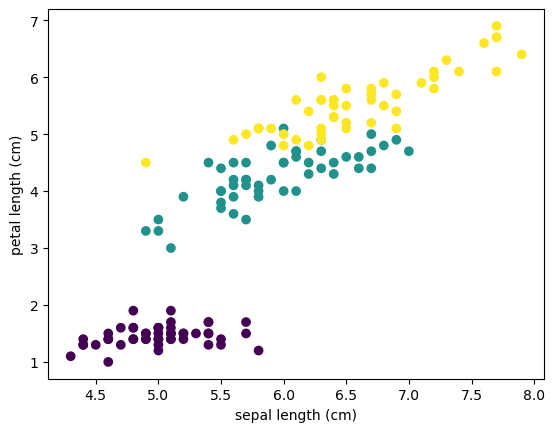

In [17]:
# Question 8a
colors = iris_df.iloc[:, [4]]
plt.scatter(iris_df.iloc[:, [0]], iris_df.iloc[:, [2]], c= colors.to_numpy())
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

##### Answer 8b
We can learn that these features are very important for the classification. They differentiate well 1+2 target groups vs target 3.


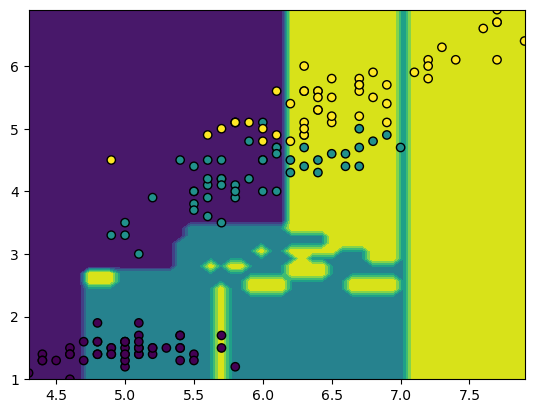

In [20]:
# 8c
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 2].min(), iris.data[:, 2].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 2], c=iris.target, edgecolor="black"
)

plt.show()